**implied volatilities**

C(S, K, t, T, r, sigma) = SN(d1) - e^(-r(T-t)).K.N(d2)

There is no closed form solution for this equation. Newton Scheme can used to find optimized solution for this equation

In [17]:
def bsm_call_value(S0, K, T, r, sigma):
    from math import log, sqrt, exp
    from scipy import stats
    
    S0 = float(S0)
    d1 = (log(S0/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0/K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)) - (K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value
    

In [18]:
def bsm_vega(S0, K, T, r, sigma):
    from math import log, sqrt
    from scipy import stats
    
    S0 = float(S0)
    d1 = (log(S0/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    
    vega = S0 * stats.norm.cdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

In [19]:
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    for i in range(it):
        #newton scheme estimation
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) / bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est

In [20]:
#intial values
V0 = 17.6639
r  = 0.01


In [21]:
#load options data
import pandas as pd

h5 = pd.HDFStore('./source/vstoxx_data_31032014.h5', 'r')
futures_data = h5['futures_data']
options_data = h5['options_data']
h5.close()

In [22]:
futures_data

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,1396224000000000000,2014,4,17.85,1397779200000000000,0.049
497,1396224000000000000,2014,5,19.55,1400198400000000000,0.126
498,1396224000000000000,2014,6,19.95,1403222400000000000,0.222
499,1396224000000000000,2014,7,20.40,1405641600000000000,0.299
500,1396224000000000000,2014,8,20.70,1408060800000000000,0.375
501,1396224000000000000,2014,9,20.95,1411084800000000000,0.471
502,1396224000000000000,2014,10,21.05,1413504000000000000,0.548
503,1396224000000000000,2014,11,21.25,1416528000000000000,0.644


In [23]:
futures_data

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,1396224000000000000,2014,4,17.85,1397779200000000000,0.049
497,1396224000000000000,2014,5,19.55,1400198400000000000,0.126
498,1396224000000000000,2014,6,19.95,1403222400000000000,0.222
499,1396224000000000000,2014,7,20.40,1405641600000000000,0.299
500,1396224000000000000,2014,8,20.70,1408060800000000000,0.375
501,1396224000000000000,2014,9,20.95,1411084800000000000,0.471
502,1396224000000000000,2014,10,21.05,1413504000000000000,0.548
503,1396224000000000000,2014,11,21.25,1416528000000000000,0.644


In [24]:
options_data

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM
46170,1396224000000000000,2014,4,C,1.0,16.85,1397779200000000000,0.049
46171,1396224000000000000,2014,4,C,2.0,15.85,1397779200000000000,0.049
46172,1396224000000000000,2014,4,C,3.0,14.85,1397779200000000000,0.049
46173,1396224000000000000,2014,4,C,4.0,13.85,1397779200000000000,0.049
46174,1396224000000000000,2014,4,C,5.0,12.85,1397779200000000000,0.049
46175,1396224000000000000,2014,4,C,6.0,11.85,1397779200000000000,0.049
46176,1396224000000000000,2014,4,C,7.0,10.85,1397779200000000000,0.049
46177,1396224000000000000,2014,4,C,8.0,9.85,1397779200000000000,0.049
46178,1396224000000000000,2014,4,C,9.0,8.85,1397779200000000000,0.049
46179,1396224000000000000,2014,4,C,10.0,7.85,1397779200000000000,0.049


In [25]:
import datetime as dt

In [26]:
futures_data['DATE'] = futures_data['DATE'].apply(lambda x : dt.datetime.fromtimestamp(x / 1e9))

In [27]:
futures_data['MATURITY'] = futures_data['MATURITY'].apply(lambda x : dt.datetime.fromtimestamp(x/1e9))

In [28]:
futures_data

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,2014-03-31 01:00:00,2014,4,17.85,2014-04-18 01:00:00,0.049
497,2014-03-31 01:00:00,2014,5,19.55,2014-05-16 01:00:00,0.126
498,2014-03-31 01:00:00,2014,6,19.95,2014-06-20 01:00:00,0.222
499,2014-03-31 01:00:00,2014,7,20.40,2014-07-18 01:00:00,0.299
500,2014-03-31 01:00:00,2014,8,20.70,2014-08-15 01:00:00,0.375
501,2014-03-31 01:00:00,2014,9,20.95,2014-09-19 01:00:00,0.471
502,2014-03-31 01:00:00,2014,10,21.05,2014-10-17 01:00:00,0.548
503,2014-03-31 01:00:00,2014,11,21.25,2014-11-21 00:00:00,0.644


In [29]:
options_data['DATE'] = options_data['DATE'].apply(lambda x : dt.datetime.fromtimestamp(x / 1e9))
options_data['MATURITY'] = options_data['MATURITY'].apply(lambda x : dt.datetime.fromtimestamp(x/1e9))

In [30]:
options_data

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM
46170,2014-03-31 01:00:00,2014,4,C,1.0,16.85,2014-04-18 01:00:00,0.049
46171,2014-03-31 01:00:00,2014,4,C,2.0,15.85,2014-04-18 01:00:00,0.049
46172,2014-03-31 01:00:00,2014,4,C,3.0,14.85,2014-04-18 01:00:00,0.049
46173,2014-03-31 01:00:00,2014,4,C,4.0,13.85,2014-04-18 01:00:00,0.049
46174,2014-03-31 01:00:00,2014,4,C,5.0,12.85,2014-04-18 01:00:00,0.049
46175,2014-03-31 01:00:00,2014,4,C,6.0,11.85,2014-04-18 01:00:00,0.049
46176,2014-03-31 01:00:00,2014,4,C,7.0,10.85,2014-04-18 01:00:00,0.049
46177,2014-03-31 01:00:00,2014,4,C,8.0,9.85,2014-04-18 01:00:00,0.049
46178,2014-03-31 01:00:00,2014,4,C,9.0,8.85,2014-04-18 01:00:00,0.049
46179,2014-03-31 01:00:00,2014,4,C,10.0,7.85,2014-04-18 01:00:00,0.049


In [31]:
futures_data

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,2014-03-31 01:00:00,2014,4,17.85,2014-04-18 01:00:00,0.049
497,2014-03-31 01:00:00,2014,5,19.55,2014-05-16 01:00:00,0.126
498,2014-03-31 01:00:00,2014,6,19.95,2014-06-20 01:00:00,0.222
499,2014-03-31 01:00:00,2014,7,20.40,2014-07-18 01:00:00,0.299
500,2014-03-31 01:00:00,2014,8,20.70,2014-08-15 01:00:00,0.375
501,2014-03-31 01:00:00,2014,9,20.95,2014-09-19 01:00:00,0.471
502,2014-03-31 01:00:00,2014,10,21.05,2014-10-17 01:00:00,0.548
503,2014-03-31 01:00:00,2014,11,21.25,2014-11-21 00:00:00,0.644


In [32]:
options_data[options_data['MATURITY'] == '2014-04-18 01:00:00']

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM
46170,2014-03-31 01:00:00,2014,4,C,1.0,16.85,2014-04-18 01:00:00,0.049
46171,2014-03-31 01:00:00,2014,4,C,2.0,15.85,2014-04-18 01:00:00,0.049
46172,2014-03-31 01:00:00,2014,4,C,3.0,14.85,2014-04-18 01:00:00,0.049
46173,2014-03-31 01:00:00,2014,4,C,4.0,13.85,2014-04-18 01:00:00,0.049
46174,2014-03-31 01:00:00,2014,4,C,5.0,12.85,2014-04-18 01:00:00,0.049
46175,2014-03-31 01:00:00,2014,4,C,6.0,11.85,2014-04-18 01:00:00,0.049
46176,2014-03-31 01:00:00,2014,4,C,7.0,10.85,2014-04-18 01:00:00,0.049
46177,2014-03-31 01:00:00,2014,4,C,8.0,9.85,2014-04-18 01:00:00,0.049
46178,2014-03-31 01:00:00,2014,4,C,9.0,8.85,2014-04-18 01:00:00,0.049
46179,2014-03-31 01:00:00,2014,4,C,10.0,7.85,2014-04-18 01:00:00,0.049


In [33]:
options_data['IMP_VOL'] = 0.0

In [34]:
tol = 0.5

In [35]:
futures_data[futures_data['MATURITY'] == '2014-04-18 01:00:00']['PRICE']

496    17.85
Name: PRICE, dtype: float64

In [37]:
#just pick the options which are in tolerance range, no need to pick up extreme values. Use futures value to compare strike
for option in options_data.index:
    forward = futures_data[futures_data['MATURITY'] == options_data.loc[option]['MATURITY']]['PRICE'].values[0]
    #print('forward price :: ' + str(forward))
    #print('option data :: ' + str(options_data.loc[option]['STRIKE']))
    if(forward * (1- tol) < options_data.loc[option]['STRIKE'] < forward * (1 + tol)):
        imp_vol = bsm_call_imp_vol(
            V0,
            options_data.loc[option]['STRIKE'],
            options_data.loc[option]['TTM'],
            r,
            options_data.loc[option]['PRICE'],
            sigma_est=2.,
            it=100)
        options_data['IMP_VOL'].loc[option] = imp_vol
        

/Users/anandvishnu/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
plot_data = options_data[options_data['IMP_VOL'] > 0]

In [39]:
maturities = sorted(set(options_data['MATURITY']))
maturities

[Timestamp('2014-04-18 01:00:00'),
 Timestamp('2014-05-16 01:00:00'),
 Timestamp('2014-06-20 01:00:00'),
 Timestamp('2014-07-18 01:00:00'),
 Timestamp('2014-08-15 01:00:00'),
 Timestamp('2014-09-19 01:00:00'),
 Timestamp('2014-10-17 01:00:00'),
 Timestamp('2014-11-21 00:00:00')]

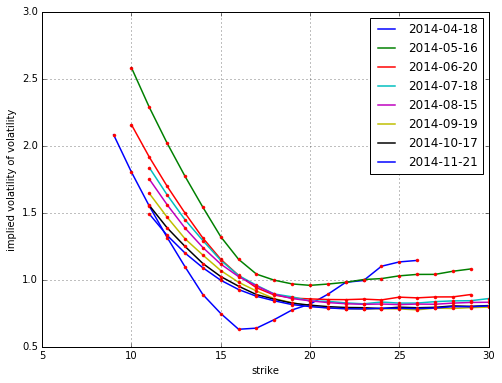

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))

for maturity in maturities:
    data = plot_data[plot_data.MATURITY == maturity]
    plt.plot(data['STRIKE'], data['IMP_VOL'], label=maturity.date(), lw=1.5)
    plt.plot(data['STRIKE'], data['IMP_VOL'], 'r.',  label='')

plt.grid(True) 
plt.xlabel('strike')
plt.ylabel('implied volatility of volatility')
plt.legend()
plt.show()
